<a href="https://colab.research.google.com/github/angyf/Proyecto_Final/blob/main/modelos_finales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORTAR LIBRERIAS Y FUNCIONES

In [1]:
# importamos librerias que nos seran de utilidad 
! pip install plotly
!pip install PyDrive

import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from keras.models import model_from_json
from sklearn import tree as treeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from matplotlib.ticker import FuncFormatter

In [2]:
# Funciones para obtener eficiencia de nuestros modelos
def calcularAccuracy(TP, TN, FP, FN):
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    accuracy = accuracy * 100
    return accuracy

def calcularPrecision(TP, TN, FP, FN):
    precision = (TP) / (TP + FP )
    precision = precision * 100
    return precision

def calcularSensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcularEspecificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

def calcularTasaFP(TP, TN, FP, FN):
    especificidad = FP / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

#INTRODUCCIÓN

Las ECV son las primer cuasa de muerte en la población adulta mexicana. Se ha determinado que son varios los factores biológicos y conductuales que propician el dasarrollo de ECV, como las enfermedades coronarias entre las más comunes. Dentro de estos factores se encuentran el sobepeso, la obesidad, causado por una mala alimentación y falta de actividad física, padecer diabetes, hipertensión, altos niveles de glucosa, colesterol, hiperlipidemias, el tabaquismo, alcoholismo.

A pesar de los planes de acción establecidos por el gobierno como, programas te atención a la salud, promoción de actividad física, regímnes alimenticios estrictos, aumento en impuestos de comesibles procesados y cigarrillos entre otros, el número de prevalencia y mortalidad de estas afecciones sigue en aumento. Y es que una de las principales causas de la alta mortalidad es el diagnóstico tardío de enfermedades cardiacas, es decir, cuando una persona es diagnosticada con enfermedad coronaria, su pronóstico de vida o tiempo de supervivencia es muy bajo. Por lo anterior surge la importancia de determinar un pronóstico temprano de las ECV.

Es por ello que con este análisis nos enfocaremos en determinar qué factores podrían estar implicados de manera importante en el desarrollo de la enfermedad coronaria (una de las ECV más comunes), y usarlos para predecir qué pacienes son más propensos a tener el riesgo de enfermedad, lo que ayudaría a disminuir los índices de mortalidad.

A continuación podemos observar el incremento en la mortalidad de la población mexicana durante los últimos años de acuerdo con información del Instituto Nacional de Estadística y Geografía.

In [3]:
#Cargamos nuestro dataset
url='https://drive.google.com/file/d/1Q_ywhZHAJ1XDNlWsMe4ru2N9-Wqny_ZW/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)


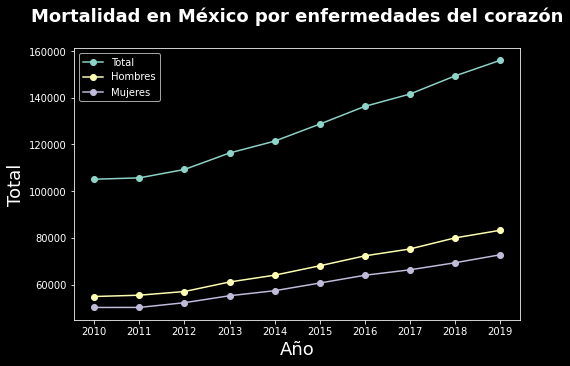

In [4]:
#filtramos solo a partir de 2010
df=df[df['PERIODO']>2009]

#Creamos el gráfico

#Definimos un estilo oscuro para nuestros gráficos
plt.style.use("dark_background")
fig, ax = plt.subplots(figsize=(8,5))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x))))

for i in ['TOTAL','HOMBRE','MUJER']:
  ax.plot_date(df['PERIODO'],df[i],ls='-')

ax.set_xlabel("Año",fontsize=18)
ax.set_ylabel("Total",fontsize=18)
ax.set_title("Mortalidad en México por enfermedades del corazón\n",fontsize=18, weight='bold')
ax.legend(['Total','Hombres','Mujeres']);

# PLANTEAMIENTO DEL PROBLEMA

La Organización Mundial de la Salud ha estimado que ocurren 12 millones de muertes en todo el mundo, cada año debido a enfermedades cardíacas y en México, las ECV ocupan el primer lugar entre las principales causas durante por enfermedades no transmisibles. A pesar de los planes de acción establecidos por el gobierno como, programas te atención a la salud, promoción de actividad física, regímnes alimenticios estrictos, aumento en impuestos de comesibles procesados y cigarrillos entre otros, el número de prevalencia y mortalidad de estas afecciones sigue en aumento. Dado este contexto, el análisis de la mortalidad por ECV en México se vuelve prioritario, para lo que se debe medir su impacto en la salud de la población. Estudiar su tendencia en el tiempo permite comprender cómo el estado de salud de la población cambia y posibilita a las instituciones replantear programas preventivos para intentar mitigar su efecto negativo. Otra forma de ayudar en la resolución del problema de la alta mortalidad, es determinar un pronóstico temprano de las ECV, ayudando a tomar decisiones sobre cambios en el estilo de vida de pacientes de alto riesgo y, a su vez, reducir las complicaciones de forma más personalizada y directa. Es por ello que en este análisis nos enfocaremos en determinar qué factores podrían estar implicados de manera importante en el desarrollo de la enfermedad coronaria crónica (una de las ECV más comunes), y usarlos para predecir qué pacienes son más propensos a tener el riesgo de enfermedad.

#  METODOLOGÍA DE ANÁLISIS

# CARGA DE DATOS

In [5]:
#Cargamos nuestro dataset

url='https://drive.google.com/file/d/1lLgbJDE7Ybb4x_4WpVcmdwxdvVJv_9A7/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path,index_col=0)


# ANÁLISIS EXPLORATORIO

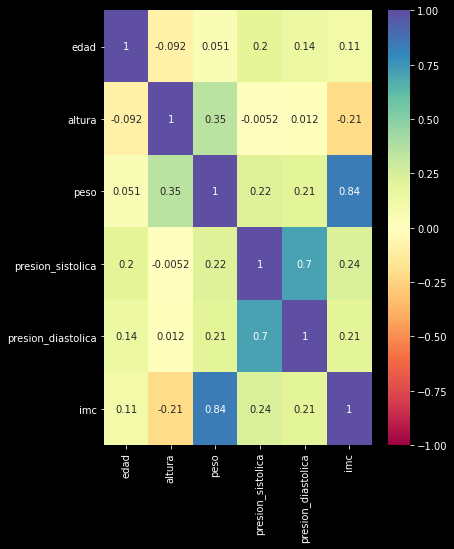

In [6]:
plt.style.use("dark_background")

#Eliminamos las variables binarias ya que no se ajustarían al mapa de calor y nos quedamos únicamente con las numéricas.
df_sin_binarios = df.drop(columns=['sexo','colesterol','glucosa','fumador','alcoholico','actividad_fisica','enfermedad_cardiaca'])

#Graficamos un mapa de calor para visualizar más rápidamente qué variables tienen una correlación.
plt.figure(figsize=(6,8))
ax = sns.heatmap(df_sin_binarios.corr(), vmin= -1, vmax=1, annot= True, cmap= 'Spectral')

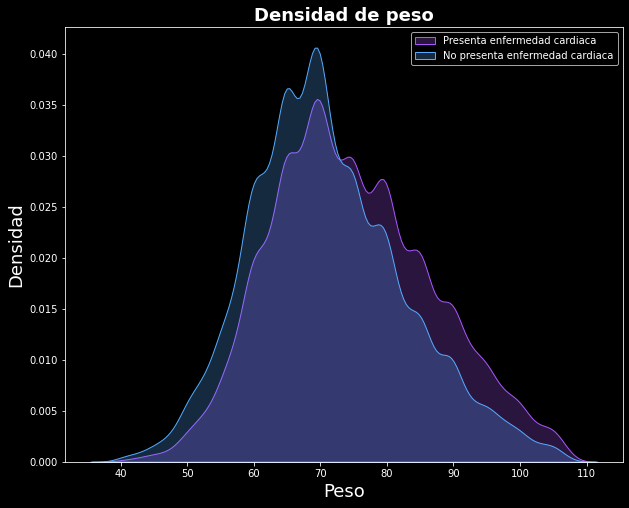

In [7]:
# Veamos el comportamiento del peso separando por presencia de enfermedad cardiovascular.
plt.style.use("dark_background")
plt.figure(figsize=(10,8))

ax= sns.kdeplot(data=df,x='peso',hue='enfermedad_cardiaca',common_norm=False,shade=True, palette='cool')
ax.set_xlabel("Peso",fontsize=18)
ax.set_ylabel("Densidad",fontsize=18)
ax.set_title("Densidad de peso",fontsize=18, weight='bold')

plt.legend(['Presenta enfermedad cardiaca','No presenta enfermedad cardiaca']);

EN la gráfica anterior podemos observar que el peso en las personas que presentan enfermedades cardiovasculares (EC) tiende a ser mayor que en aquellas que no presentan EC.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Presión sistólica')

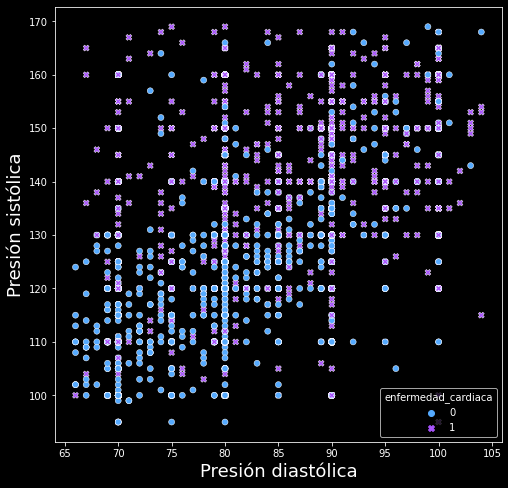

In [8]:
#Veamos el comportamiento de las presiones con respecto a si padecen o no una enfermedad cardiaca
plt.figure(figsize=(8,8))
ax=sns.scatterplot(df['presion_diastolica'],df['presion_sistolica'],hue=df['enfermedad_cardiaca'],style=df['enfermedad_cardiaca'],palette="cool")
ax.set_xlabel("Presión diastólica",fontsize=18)
ax.set_ylabel("Presión sistólica",fontsize=18)


En el gráfico anterior, además de corroborar que existe una correlación lineal entre las variables presión sistólica y diastólica, la presencia de una EC aumenta los niveles de ambas.


# CLASIFICACIÓN SUPERVISADA

Lo que se busca a continuación es crear distintos modelos con el fin de obtener el que realice una mejor clasificación sobre si la persona desarrollara o no una enfermedad cardiaca de acuerdo con ciertas caracteristicas.

Se realizo la creación de 4 modelos,:

* Red neuronal

* Regresión logistica

* Árboles de decisión

* Bosque aleatorios

In [9]:
# separamos nuestros datos en la variable a predecir y y las variables independientes que resultaron significativas para los modelos a crear
y=df.enfermedad_cardiaca
X=df.drop(['enfermedad_cardiaca','imc','sexo','presion_diastolica'],axis=1)

# separar en datos de prueba y entrenamiento
X_train_full,X_valid_full, y_train, y_valid=train_test_split(X,y,test_size=0.3,random_state=15)

# Seleccionar variables numericas 
numerical_cols=[name for name in X_train_full.columns if X_train_full[name].dtype in ["int64","float64"]]

# seleccionar las columnas que queremos
X_train =X_train_full[numerical_cols].copy()
X_valid=X_valid_full[numerical_cols].copy()

#Preprocesar las variables numericas
numerical_transformer= SimpleImputer(strategy="most_frequent")

#Juntar las variables preprocesadas
preprocessor= ColumnTransformer(
    transformers=[("num",numerical_transformer,numerical_cols)])


## Redes neuronales

In [10]:
# Definamos nuestra red neuronal con Keras
red_neuronal = Sequential()
#Agregamos capas, imput_dim es el numero de inputs que recibe cada capa, solo se
#le agrega a la primera pues conocemos el numero de variables con las que iniciamos 
red_neuronal.add(Dense(17, input_dim=9, activation="relu"))
red_neuronal.add(Dense(5, activation="relu"))
red_neuronal.add(Dense(14, activation="relu"))
red_neuronal.add(Dense(3, activation="relu"))
red_neuronal.add(Dense(9, activation="relu"))
#La ultima función de activación es sigmoide debido a que el resultado esperado es
#una variable binaria
red_neuronal.add(Dense(1, activation="sigmoid"))
# Compilar
red_neuronal.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#Entrenamos el modelo
red_neuronal.fit(X_train,y_train, epochs=150, batch_size= 28)

Epoch 1/150
1527/1527 [==============================] - 15s 1ms/step - loss: 0.7109 - accuracy: 0.6376
Epoch 2/150
1527/1527 [==============================] - 2s 1ms/step - loss: 0.5936 - accuracy: 0.6963
Epoch 3/150
1527/1527 [==============================] - 2s 1ms/step - loss: 0.5852 - accuracy: 0.7043
Epoch 4/150
1527/1527 [==============================] - 2s 1ms/step - loss: 0.5840 - accuracy: 0.7068
Epoch 5/150
1527/1527 [==============================] - 2s 2ms/step - loss: 0.5804 - accuracy: 0.7075
Epoch 6/150
1527/1527 [==============================] - 2s 2ms/step - loss: 0.5818 - accuracy: 0.7072
Epoch 7/150
1527/1527 [==============================] - 2s 1ms/step - loss: 0.5838 - accuracy: 0.7050
Epoch 8/150
1527/1527 [==============================] - 2s 1ms/step - loss: 0.5835 - accuracy: 0.7072
Epoch 9/150
1527/1527 [==============================] - 2s 2ms/step - loss: 0.5815 - accuracy: 0.7085
Epoch 10/150
1527/1527 [==============================] - 2s 1ms/step - 

In [11]:
#prediccion sobre la red
y_predict = red_neuronal.predict_classes(X_valid)

# Métricas del modelo
resultado = confusion_matrix(y_valid, y_predict)
(TN, FP, FN, TP) = resultado.ravel()
 
acc = calcularAccuracy(TP, TN, FP, FN)
sen = calcularSensibilidad(TP, TN, FP, FN)
spec = calcularEspecificidad(TP, TN, FP, FN)
print("Precision:"+str(acc)+"%")
print("Sensibilidad:"+str(sen)+"%")
print("Especificidad:"+str(spec)+"%")

# Guardar el modelo entrenado
model_json = red_neuronal.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
#serializar los pesos a HDF5
red_neuronal.save_weights("model.h5")

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Precision:72.06484362207303%
Sensibilidad:63.08243727598566%
Especificidad:80.60257638667092%


## Bitácoras de experimentos

## Experimento 0
- Capas 9
- Neuronas por capa 10,15,8,4,9,11,5,2,1
- Epochs 68
- Batch 45
- Exactitud 51.26% 
- Sensibilidad 0%
- Especificidad 100%



**Experimento 1**
- Capas  6
- Neuronas por capa 10,15,8,13,5,1
- Epochs 130
- Batch 28
- Exactitud 71.69%
- Sensibilidad 75.33%
- Especificidad 68.24%


**Experimento 2**
- Capas 4
- Neuronas por capa 10,15,8,1
- Epochs 130
- Batch 28
- Exactitud 72.10%
- Sensibilidad 64.15%
- Especificidad 79.64%


**Experimento 3**
- Capas 9
- Neuronas por capa 20,13,7,15,2,9,5,7,1
- Epochs 120
- Batch 25
- Exactitud 72.15
- Sensibilidad 66.53
- Especificidad 77.50


**Experimento 4**
- Capas 12
- Neuronas por capa 30,18,20,13,5,17,6,3,16,20,5,1 
- Epochs 130
- Batch 15
- Exactitud 72.23 
- Sensibilidad 66.55
- Especificidad 77.63


**Experimento 5**
- Capas 5
- Neuronas por capa 17,5,9,15,1 
- Epochs 130
- Batch 35
- Exactitud 71.73
- Sensibilidad 61.02
- Especificidad 81.91

**Experimento 6**
- Capas 6
- Neuronas por capa 17,5,14,3,9,1 
- Epochs 130
- Batch 28
- Exactitud  71.97
- Sensibilidad  64.79
- Especificidad 78.80

**Experimento 7**
- Capas 7
- Neuronas por capa 4,13,7,19,5,8,1 
- Epochs 130
- Batch 35
- Exactitud 72.16
- Sensibilidad 66.71
- Especificidad 77.34

**Experimento 8**
- Capas 6
- Neuronas por capa 17,5,14,3,9,1 
- Epochs 150
- Batch 28
- Exactitud 72.27
- Sensibilidad 73.01
- Especificidad 71.57

**Experimento 9**
- Capas 6
- Neuronas por capa 7,73,14,6,11,1 
- Epochs 130
- Batch 28
- Exactitud 72.26 
- Sensibilidad 69.18
- Especificidad 75.19

**Experimento 10**
- Capas 5
- Neuronas por capa 2,5,9,3,1
- Epochs 130
- Batch 50
- Exactitud 69.76
- Sensibilidad 69.10
- Especificidad 70.39

**Experimento 11**
- Capas 6
- Neuronas por capa 27,14,6,19,5,1 
- Epochs 130
- Batch 28
- Exactitud 72.42
- Sensibilidad 67.32
- Especificidad 77.27

**Experimento 12**
- Capas 8
- Neuronas por capa 40,35,17,9,4,12,3,1 
- Epochs 300
- Batch 50
- Exactitud 72.09 
- Sensibilidad  59.89
- Especificidad 83.70

**Experimento 13**
tarda mucho en entrenarse
- Capas 6
- Neuronas por capa 10,15,8,13,5,1 
- Epochs 300
- Batch 5
- Exactitud 72.13%
- Sensibilidad 66.82%
- Especificidad 77.185

**Experimento 14**
- Capas 6
- Neuronas por capa 13,18,5,9,3,1
- Epochs 500
- Batch 15
- Exactitud  72.14%
- Sensibilidad 63.39%
- Especificidad 80.45%

**Experimento 15**
- Capas 6
- Neuronas por capa 23,18,9,15,3,1
- Epochs 300
- Batch 25
- Exactitud 71.78%
- Sensibilidad 58.19%
- Especificidad 84.70%

**Experimento 16**
- Capas 6
- Neuronas por capa 10,15,8,13,5,1
- Epochs 150
- Batch 28
- Exactitud 71.75%
- Sensibilidad 60.56%
- Especificidad 82.40%


**Experimento 17**
- Capas 6
- Neuronas por capa 13,18,5,9,3,1 
- Epochs 250
- Batch 28
- Exactitud 71.32
- Sensibilidad 75.31
- Especificidad 67.53


**Experimento 18**
- Capas 6
- Neuronas por capa 13,18,9,15,3,1 
- Epochs 150 
- Batch 25
- Exactitud 72.17
- Sensibilidad 63.97
- Especificidad 79.96

**Experimento 19**

- Capas 6
- Neuronas por capa 13,18,5,9,3,1 
- Epochs 130
- Batch 28
- Exactitud 72.32
- Sensibilidad 68.49
- Especificidad 75.97

**Experimento 20**

- Capas 6
- Neuronas por capa 10,15,8,13,5,1
- Epochs 250
- Batch 28
- Exactitud 72.275
- Sensibilidad 66.25%
- Especificidad 78.00%

Hasta ahora se ha elegido el modelo 8 que cuenta con métricas que se consideraron adecuadas para el tipo de problema que se esta trabajando, por lo que se realiza su carga para poder replicar su precisión, especificidad  y sensibilidad.


In [12]:
# Damos los permisos para almacenar los archivos de manera temporal 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# importamos los archivos de Drive del modelo entrenado previamente elegido.
downloaded = drive.CreateFile({'id':"1d-yNqWirMTsMA-VHHgDmmWQzMkEvCdLZ"})   # replace the id with id of file you want to access
downloaded.GetContentFile('model.json') 
downloaded = drive.CreateFile({'id':"1J6pDWA31mwqAKZ6Q7UHQKq0IJNeJqN9A"})   # replace the id with id of file you want to access
downloaded.GetContentFile('model.h5') 


In [13]:
# cargar la información para el modelo elegido
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Modelo cargado.")
 
# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Modelo cargado.


In [14]:
#prediccion del modelo cargado
y_predict = loaded_model.predict_classes(X_valid)

# Resultados (métricas de l modelo)
resultado = confusion_matrix(y_valid, y_predict)
(TN, FP, FN, TP) = resultado.ravel()
 
acc_red = calcularAccuracy(TP, TN, FP, FN)
pre_red = calcularPrecision(TP, TN, FP, FN)
sen_red = calcularSensibilidad(TP, TN, FP, FN)
spec_red = calcularEspecificidad(TP, TN, FP, FN)


print("Exactitud:"+str(acc_red)+"%")
print("Precision"+str(pre_red)+"%")
print("Sensibilidad:"+str(sen_red)+"%")
print("Especificidad:"+str(spec_red)+"%")


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



Exactitud:72.2777140985754%
Precision70.94351942539994%
Sensibilidad:73.01747311827957%
Especificidad:71.57457681251996%


## Regresión logistica

In [15]:
# definimos el modelo
reg= LogisticRegression(max_iter=45000,random_state=23)
#conjuntar los datos preprocesados
pipeReg=Pipeline(steps=[("preprocessor",preprocessor),
                            ("model",reg)])
#Entrenamiento
pipeReg.fit(X_train,y_train)
# Predicción
preds= pipeReg.predict(X_valid)

In [16]:
# Resultados (métricas de l modelo)
resultado = confusion_matrix(y_valid, preds)
(TN, FP, FN, TP) = resultado.ravel()
 
acc_rl = calcularAccuracy(TP, TN, FP, FN)
pre_rl = calcularPrecision(TP, TN, FP, FN)
sen_rl = calcularSensibilidad(TP, TN, FP, FN)
spec_rl = calcularEspecificidad(TP, TN, FP, FN)

print("Exactitud:"+str(acc_rl)+"%")
print("Precision"+str(pre_rl)+"%")
print("Sensibilidad:"+str(sen_rl)+"%")
print("Especificidad:"+str(spec_rl)+"%")


Exactitud:71.87926423230174%
Precision74.58973691065381%
Sensibilidad:64.14650537634408%
Especificidad:79.22921324390504%


## Árboles de decisión

In [17]:
#Creamos y entrenamos el modelo
arbol = treeClassifier.DecisionTreeClassifier(random_state=83)
arbol = arbol.fit(X_train, y_train)

#plt.figure(figsize = (10,10), dpi = 300)
#treeClassifier.plot_tree(arbol,filled = True);
#plt.show()

In [18]:
#Predicciones y matriz de confusión
y_pred = arbol.predict(X_valid)
enfermedad = np.array(y_valid)
predictions = np.array(y_pred)
confusion_matrix(enfermedad, predictions)

array([[6202, 3191],
       [3539, 5389]])

In [19]:
#Métricas para comparación
resultado = confusion_matrix(enfermedad, predictions)

(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN)+"\n")
 
acc_ar = calcularAccuracy(TP, TN, FP, FN)
pre_ar = calcularPrecision(TP, TN, FP, FN)
sen_ar = calcularSensibilidad(TP, TN, FP, FN)
spec_ar = calcularEspecificidad(TP, TN, FP, FN)
print("Exactitud:"+str(acc_ar)+"%")
print("Precision"+str(pre_ar)+"%")
print("Sensibilidad:"+str(sen_ar)+"%")
print("Especificidad:"+str(spec_ar)+"%")


True positives: 5389
True negatives: 6202
False positives: 3191
False negative: 3539

Exactitud:63.26619725997489%
Precision62.80885780885781%
Sensibilidad:60.36066308243727%
Especificidad:66.02789311189183%


## Random Forest

In [20]:
#Creamos y entrenamos el modelo
bosque = RandomForestRegressor(n_estimators=80, random_state=1)
bosque.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=80, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [21]:
#Predicción del modelo
preds= bosque.predict(X_valid)

# Se considera un umbral de .6 para considerar un valor como positivo, por lo que se 
# si la predicción obtneida es mayor o igual a 0.6 indicara la presencia de EC 
# en otro caso, se considera como ausencia de enfermedad.

for i in range(0,len(preds)):
  if preds[i]>=0.6:
    preds[i]=1
  else:
    preds[i]=0

In [22]:
#Métricas para comparación
resultado = confusion_matrix(enfermedad, preds)

(TN, FP, FN, TP) = resultado.ravel()
print("True positives: "+str(TP))
print("True negatives: "+str(TN))
print("False positives: "+str(FP))
print("False negative: "+str(FN)+"\n")
 
acc_bos = calcularAccuracy(TP, TN, FP, FN)
pre_bos = calcularPrecision(TP, TN, FP, FN)
sen_bos = calcularSensibilidad(TP, TN, FP, FN)
spec_bos = calcularEspecificidad(TP, TN, FP, FN)
print("Exactitud:"+str(acc_bos)+"%")
print("Precision"+str(pre_bos)+"%")
print("Sensibilidad:"+str(sen_bos)+"%")
print("Especificidad:"+str(spec_bos)+"%")


True positives: 5241
True negatives: 7274
False positives: 2119
False negative: 3687

Exactitud:68.3095900878773%
Precision71.20923913043478%
Sensibilidad:58.70295698924731%
Especificidad:77.44064729053551%


# COMPARACIÓN DE MODELOS

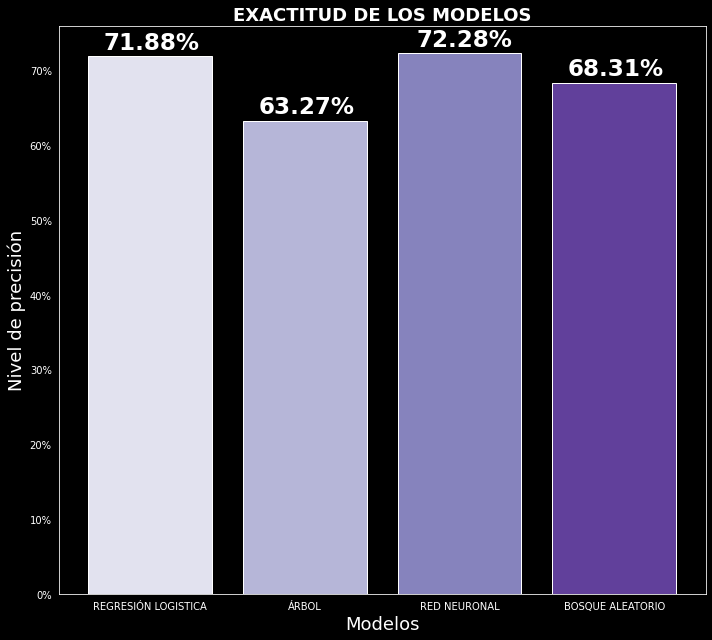

In [23]:
#COMPARAMOS LA EXACTITUD DE NUESTROS MODELOS A TRAVÉS DE UN GRÁFICO
# Creamos la lista del accuracy de los modelos
test_accuracy = [acc_rl,acc_ar,acc_red,acc_bos]

# Gráfica de precisión
#Definimos un estilo oscuro para nuestros gráficos

#Definimos un estilo oscuro para nuestros gráficos
sns.set_style("dark")
plt.style.use("dark_background")


fig, ax = plt.subplots(figsize=(10,9))
#damos formato de porcentaje al eje y
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)
colors=sns.color_palette("Purples",4)

modelos=[ 'REGRESIÓN LOGISTICA', 'ÁRBOL','RED NEURONAL','BOSQUE ALEATORIO']
ax.bar(modelos, test_accuracy,color=colors)
ax.set_title('EXACTITUD DE LOS MODELOS', fontsize=18, color='w', weight='bold')
ax.set_xlabel('Modelos', fontsize=18, color='w')
ax.set_ylabel('Nivel de precisión', fontsize=18, color='w')

x=[-.3,.7,1.72,2.7]
#agregamos etiquetas
for i in range(0,4):
  plt.annotate(f'{round(test_accuracy[i],2)}%',(x[i],test_accuracy[i]+1),fontsize=23,weight='bold')

plt.tight_layout()
plt.show()

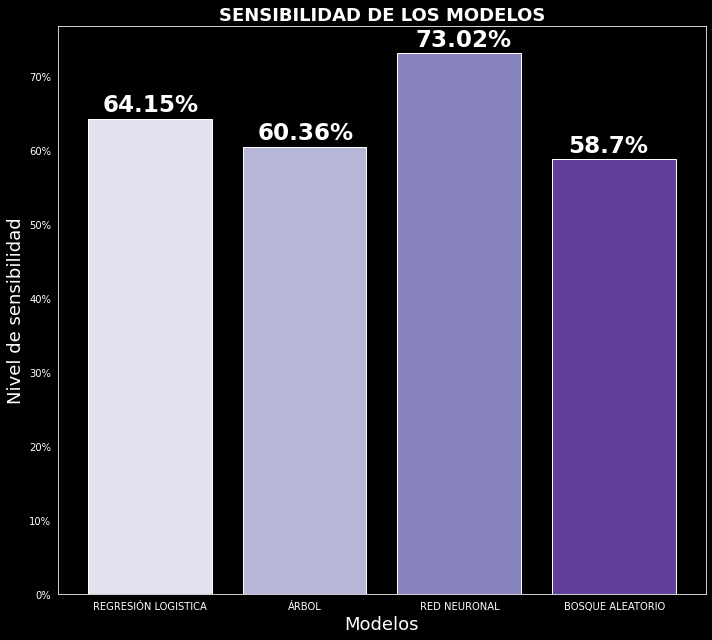

In [24]:
#COMPARAMOS LA SENSIBILIDAD DE NUESTROS MODELOS A TRAVÉS DE UN GRÁFICO
sensibilidad=[sen_rl,sen_ar,sen_red,sen_bos]

# Gráfica de sensibilidad
fig, ax = plt.subplots(figsize=(10,9))
#damos formato de porcentaje al eje y
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)
ax.bar(modelos, sensibilidad,color=colors)
ax.set_title('SENSIBILIDAD DE LOS MODELOS', fontsize=18, color='w', weight='bold')
ax.set_xlabel('Modelos', fontsize=18, color='w')
ax.set_ylabel('Nivel de sensibilidad', fontsize=18, color='w')
#agregamos etiquetas
for i in range(0,4):
  plt.annotate(f'{round(sensibilidad[i],2)}%',(x[i],sensibilidad[i]+1),fontsize=23,weight='bold')

plt.tight_layout()
plt.show()

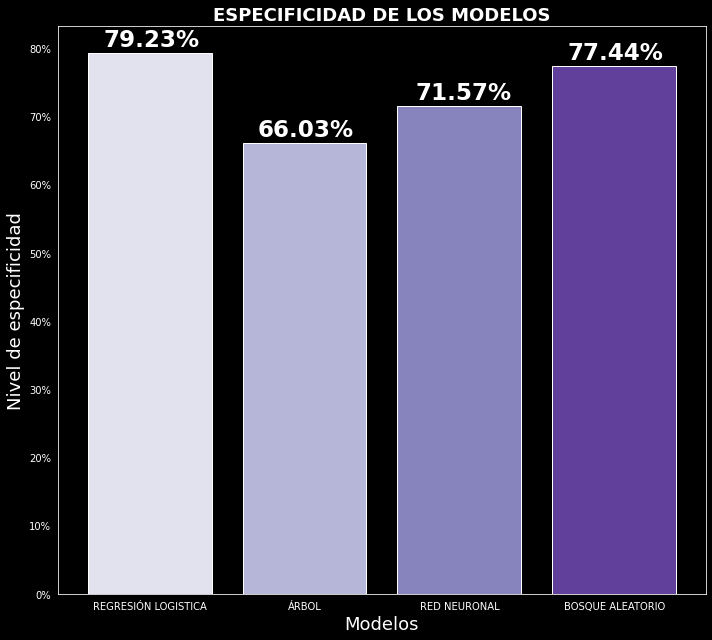

In [25]:
#COMPARAMOS LA ESPECIFICIDAD DE NUESTROS MODELOS A TRAVÉS DE UN GRÁFICO

especificidad=[spec_rl,spec_ar,spec_red,spec_bos]

# Gráfica de especificidad
fig, ax = plt.subplots(figsize=(10,9))
#damos formato de porcentaje al eje y
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)
ax.bar(modelos,especificidad,color=colors)
ax.set_title('ESPECIFICIDAD DE LOS MODELOS', fontsize=18, color='w', weight='bold')
ax.set_xlabel('Modelos', fontsize=18, color='w')
ax.set_ylabel('Nivel de especificidad', fontsize=18, color='w')
#agregamos etiquetas al grafico
for i in range(0,4):
  plt.annotate(f'{round(especificidad[i],2)}%',(x[i],especificidad[i]+1),fontsize=23,weight='bold')
plt.tight_layout()

plt.show()

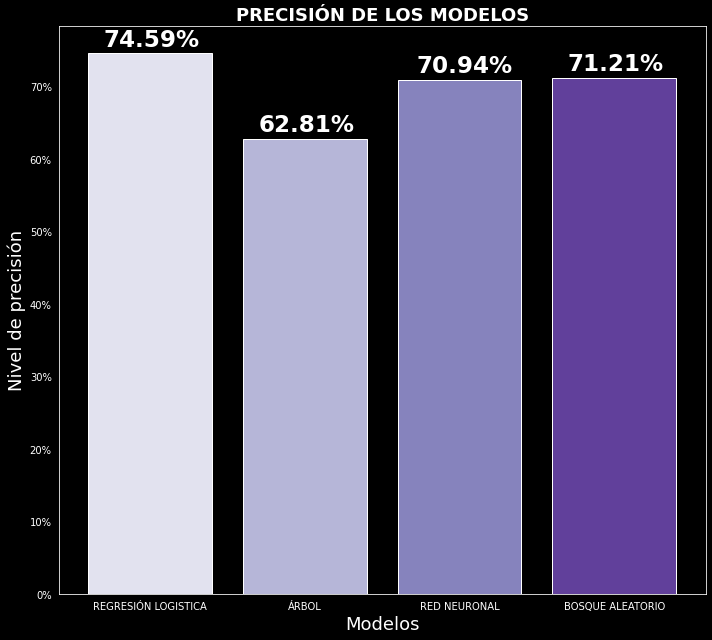

In [28]:
#COMPARAMOS LA ESPECIFICIDAD DE NUESTROS MODELOS A TRAVÉS DE UN GRÁFICO

precision=[pre_rl,pre_ar,pre_red,pre_bos]

# Gráfica de precision
fig, ax = plt.subplots(figsize=(10,9))
#damos formato de porcentaje al eje y
formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
ax.yaxis.set_major_formatter(formatter)
ax.bar(modelos,precision,color=colors)
ax.set_title('PRECISIÓN DE LOS MODELOS', fontsize=18, color='w', weight='bold')
ax.set_xlabel('Modelos', fontsize=18, color='w')
ax.set_ylabel('Nivel de precisión', fontsize=18, color='w')
#agregamos etiquetas al grafico
for i in range(0,4):
  plt.annotate(f'{round(precision[i],2)}%',(x[i],precision[i]+1),fontsize=23,weight='bold')
plt.tight_layout()

plt.show()

In [46]:
metricas=pd.DataFrame([test_accuracy,precision,sensibilidad,especificidad],columns=modelos,index=["Exactitud","Precisión","Sensibilidad","Especificidad"])
metricas

,REGRESIÓN LOGISTICA,ÁRBOL,RED NEURONAL,BOSQUE ALEATORIO
Exactitud,71.879264,63.266197,72.277714,68.309590
Precisión,74.589737,62.808858,70.943519,71.209239
Sensibilidad,64.146505,60.360663,73.017473,58.702957
Especificidad,79.229213,66.027893,71.574577,77.440647


De acuerdo con las métricas obtenidas en los 4 modelos de predicción se elige el modelo de red neuronal, pues presenta un nivel de exactitud y sensibilidad mayor al resto de los modelos los cuales tienen un mayor peso en este tipo de problemas pues principalmente nos interesa predecir de manera correcta aquellas personas que presentaran una EC.